In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

warnings.filterwarnings("ignore")

# Tabular Playground Series - Nov 2021

The tabular series on kaggle are meant to help novices in data science field to get acquainted with kaggle competitions.

The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting identifying spam emails via various extracted features from the email. Although the features are anonymized, they have properties relating to real-world features.



# Train dataset

Lets first explore the train dataset and subsequently the test dataset.


In [3]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-nov-2021/train.csv", sep=",")

In [4]:
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [5]:
print('Dataset shape: ', train_df.shape )

Dataset shape:  (600000, 102)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float64(100), int64(2)
memory usage: 466.9 MB


In [7]:
train_df.dtypes

id          int64
f0        float64
f1        float64
f2        float64
f3        float64
           ...   
f96       float64
f97       float64
f98       float64
f99       float64
target      int64
Length: 102, dtype: object

In [8]:
train_df.dtypes.value_counts()

float64    100
int64        2
dtype: int64

In [9]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,600000.0,299999.500000,173205.225094,0.00000,149999.750000,299999.500000,449999.250000,599999.00000
f0,600000.0,0.306508,0.522450,-3.79745,0.026222,0.097788,0.397184,8.78150
f1,600000.0,2.497590,1.554018,-1.22396,1.186238,2.516500,3.787630,6.22672
f2,600000.0,306.644536,551.743893,-1842.53000,43.573400,133.626000,302.262250,6119.28000
f3,600000.0,2.647901,1.544529,-1.36856,1.442028,2.634130,3.907640,6.52115
...,...,...,...,...,...,...,...,...
f96,600000.0,2.547853,1.558427,-1.58474,1.247888,2.601940,3.820665,6.25436
f97,600000.0,2.590159,1.525091,-1.25473,1.348078,2.682090,3.839520,6.14530
f98,600000.0,0.158881,0.436190,-3.99350,0.013536,0.058058,0.110718,10.76700
f99,600000.0,0.123048,0.264896,-2.78338,0.018105,0.058471,0.104872,5.98811


In [10]:
print("There are", train_df.isna().any().sum(), "missing values")

There are 0 missing values


Text(0, 0.5, 'Count')

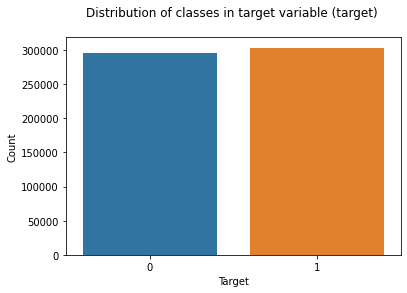

In [11]:
# Target Distribution
sns.countplot(train_df['target'])
plt.title("Distribution of classes in target variable (target) \n")
plt.xlabel("Target")
plt.ylabel("Count")

In [12]:
train_df.groupby('target')['target'].count()

target
0    296394
1    303606
Name: target, dtype: int64

<AxesSubplot:>

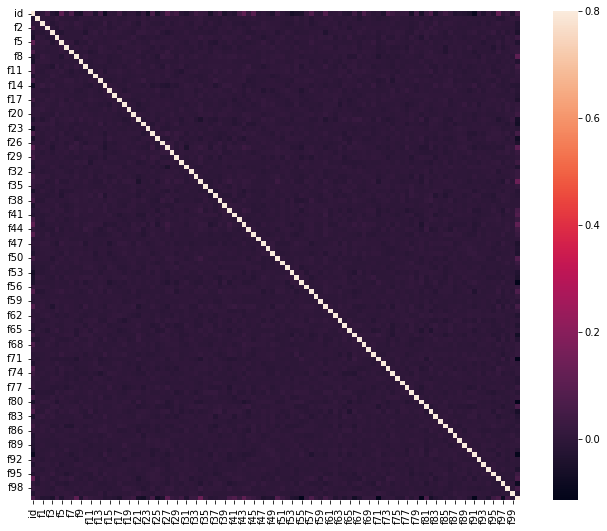

In [13]:
corr_matrix = train_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

In [14]:
train_df['target']

0         0
1         0
2         0
3         0
4         1
         ..
599995    1
599996    0
599997    0
599998    1
599999    1
Name: target, Length: 600000, dtype: int64

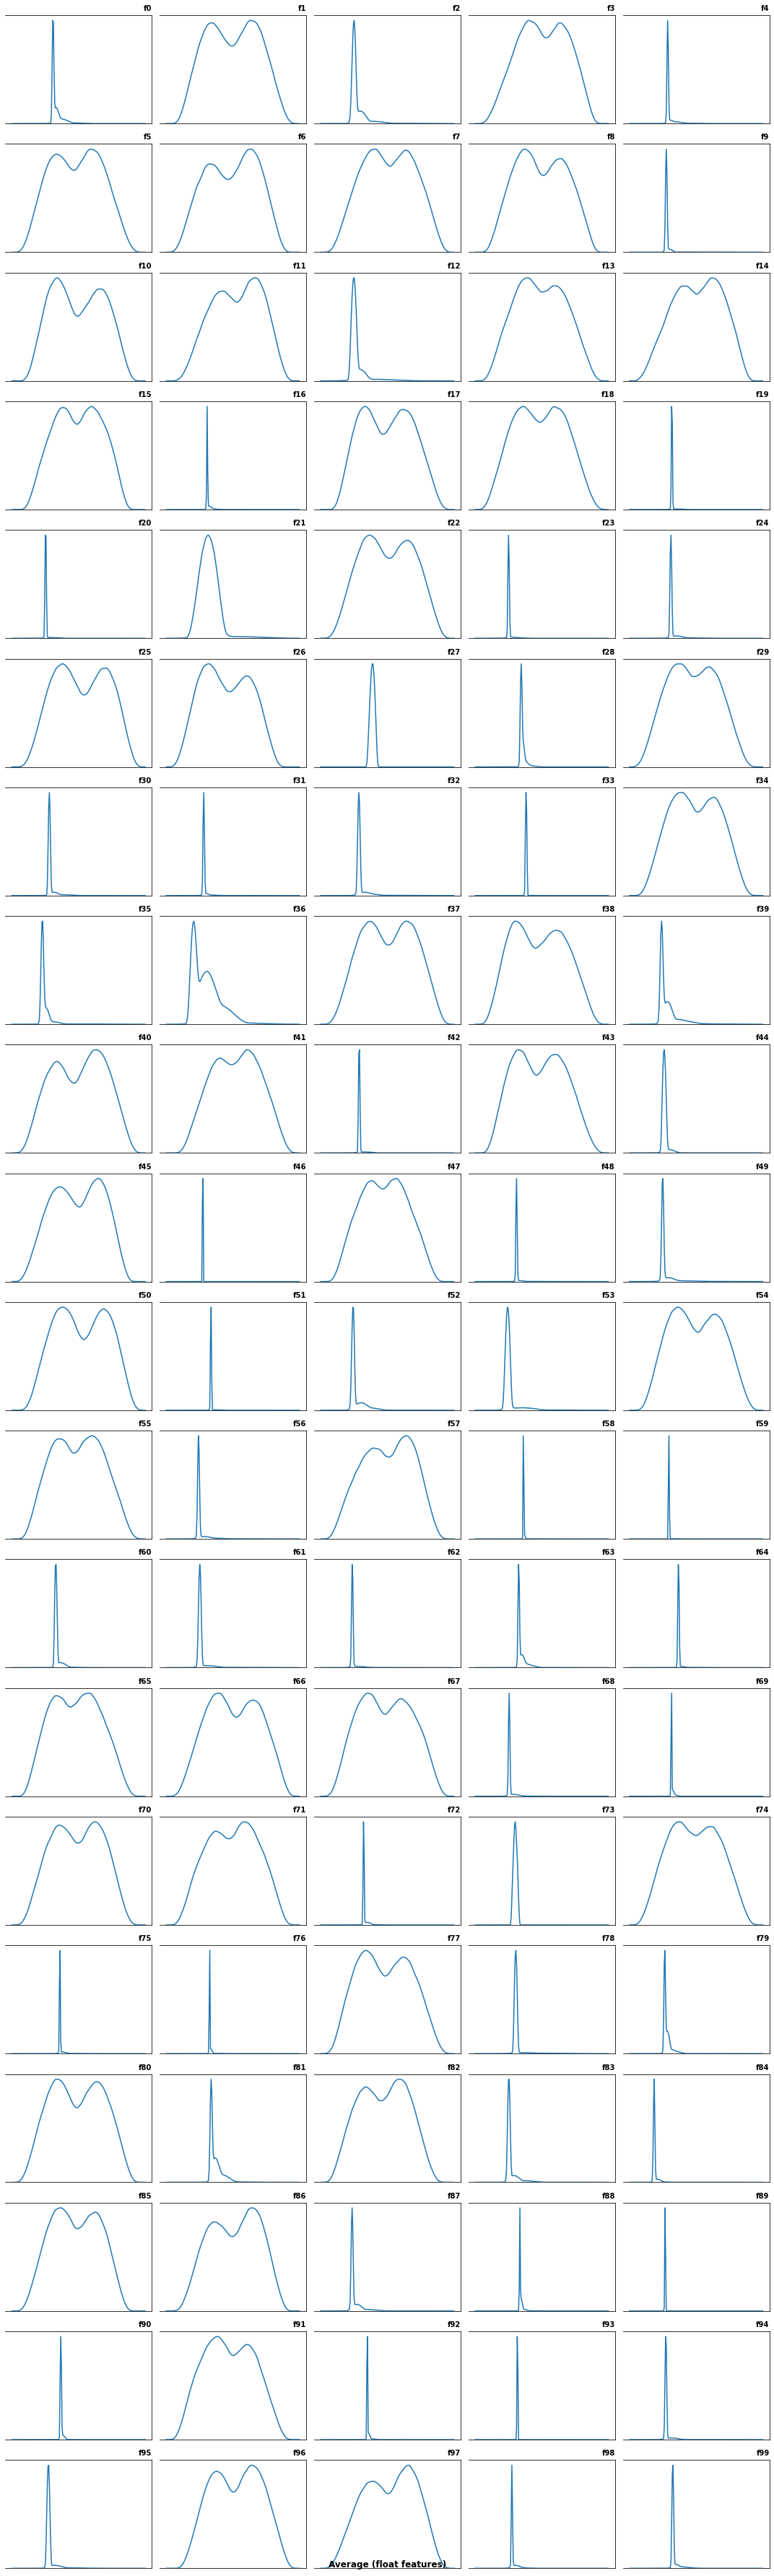

In [15]:
fig, axes = plt.subplots(20,5,figsize=(15, 50))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = train_df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=train_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

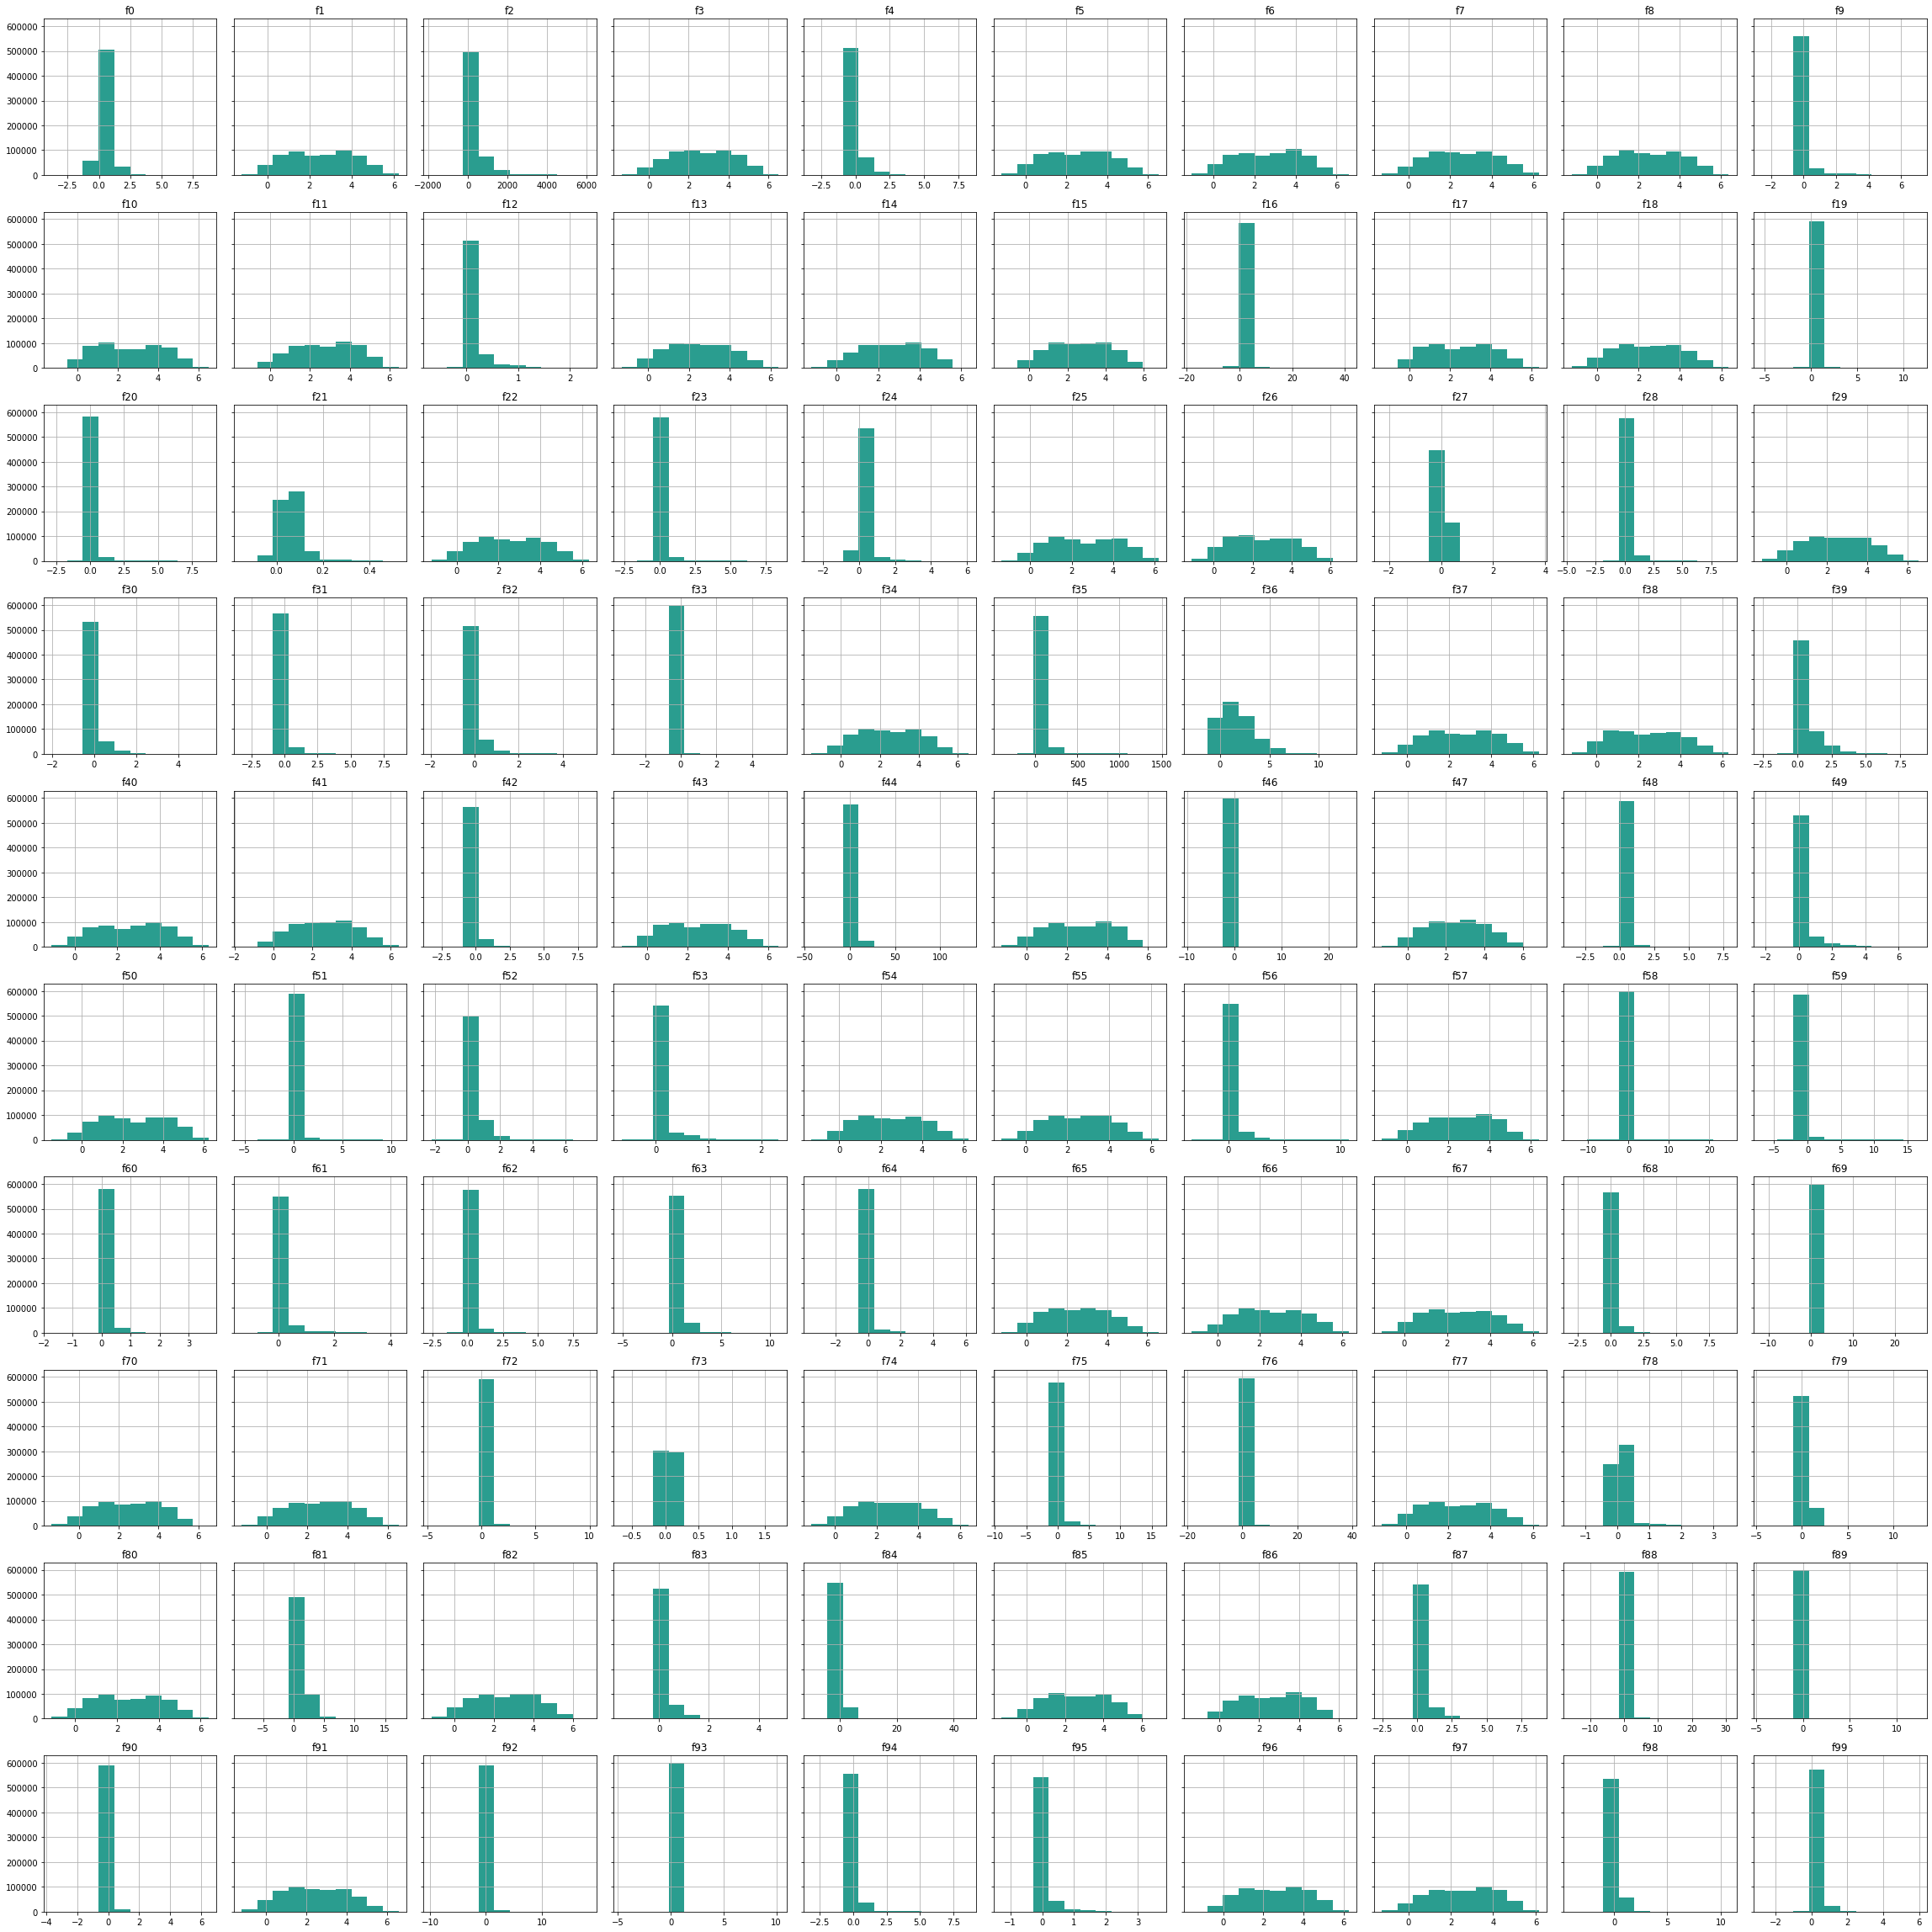

In [16]:
train_df.select_dtypes(include='float64').hist(figsize=(32, 32), sharey=True);
plt.tight_layout()

# Summary 1

The train dataset has 102 features with a total of 600000 samples. All features are of type float64, except for the target variable and id. There are no missing values. The target variable is well balanced and there are no correlated variables. Most of the features distribution looks bimodal or right-skewed.


# Test dataset

Here we will do the same analysis to test dataset.


In [17]:
del train_df
gc.collect()

328023

In [18]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/test.csv', sep=',')

In [19]:
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003229,4.838660,585.529,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,...,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
1,600001,0.008602,0.505536,-100.099,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,...,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
2,600002,1.461000,2.437260,-112.964,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,...,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
3,600003,0.140556,3.085610,179.451,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,...,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
4,600004,0.128876,5.199760,107.466,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,...,0.058860,2.660430,0.135425,0.036481,0.093912,0.056315,1.110710,3.584470,0.145319,-0.050393


In [20]:
print('Dataset shape: ', test_df.shape )

Dataset shape:  (540000, 101)


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Columns: 101 entries, id to f99
dtypes: float64(100), int64(1)
memory usage: 416.1 MB


In [22]:
test_df.dtypes

id       int64
f0     float64
f1     float64
f2     float64
f3     float64
        ...   
f95    float64
f96    float64
f97    float64
f98    float64
f99    float64
Length: 101, dtype: object

In [23]:
test_df.dtypes.value_counts()

float64    100
int64        1
dtype: int64

In [24]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,540000.0,869999.500000,155884.717018,600000.00000,734999.750000,869999.500000,1.004999e+06,1.139999e+06
f0,540000.0,0.348663,0.566251,-3.62865,0.043555,0.115868,4.579395e-01,8.666950e+00
f1,540000.0,2.618251,1.543507,-1.26015,1.326280,2.657140,3.884850e+00,6.434070e+00
f2,540000.0,263.577730,496.444309,-1764.16000,27.361175,115.631000,2.454462e+02,6.098190e+03
f3,540000.0,2.583735,1.529646,-1.37056,1.408300,2.547380,3.812990e+00,6.275570e+00
...,...,...,...,...,...,...,...,...
f95,540000.0,0.092847,0.191741,-1.90749,0.020370,0.056317,9.505752e-02,4.097870e+00
f96,540000.0,2.442579,1.567684,-1.93905,1.117510,2.458465,3.737155e+00,6.210380e+00
f97,540000.0,2.640276,1.537125,-1.23205,1.385690,2.740695,3.903460e+00,6.421930e+00
f98,540000.0,0.158335,0.430856,-4.53793,0.018050,0.063792,1.155880e-01,1.077700e+01


In [25]:
print("There are", test_df.isna().any().sum(), "missing values")

There are 0 missing values


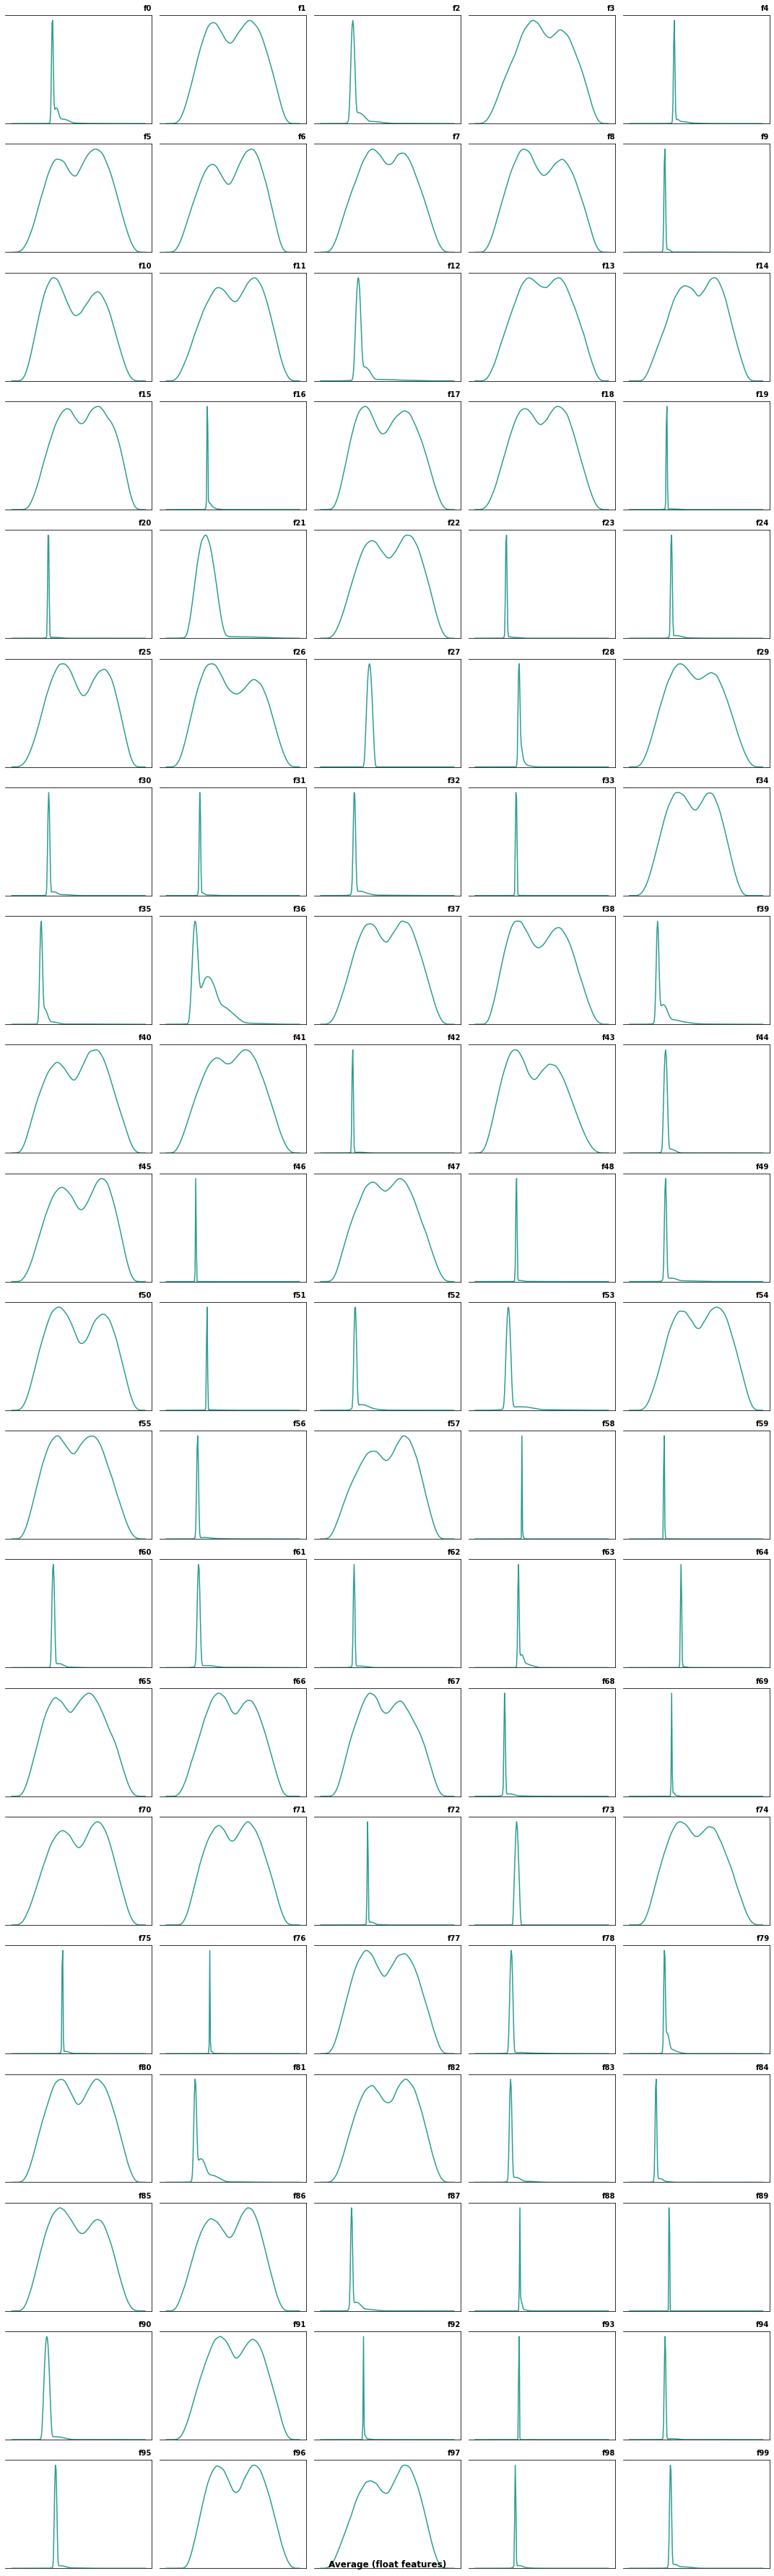

In [26]:
fig, axes = plt.subplots(20,5,figsize=(15, 50))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = test_df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=test_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

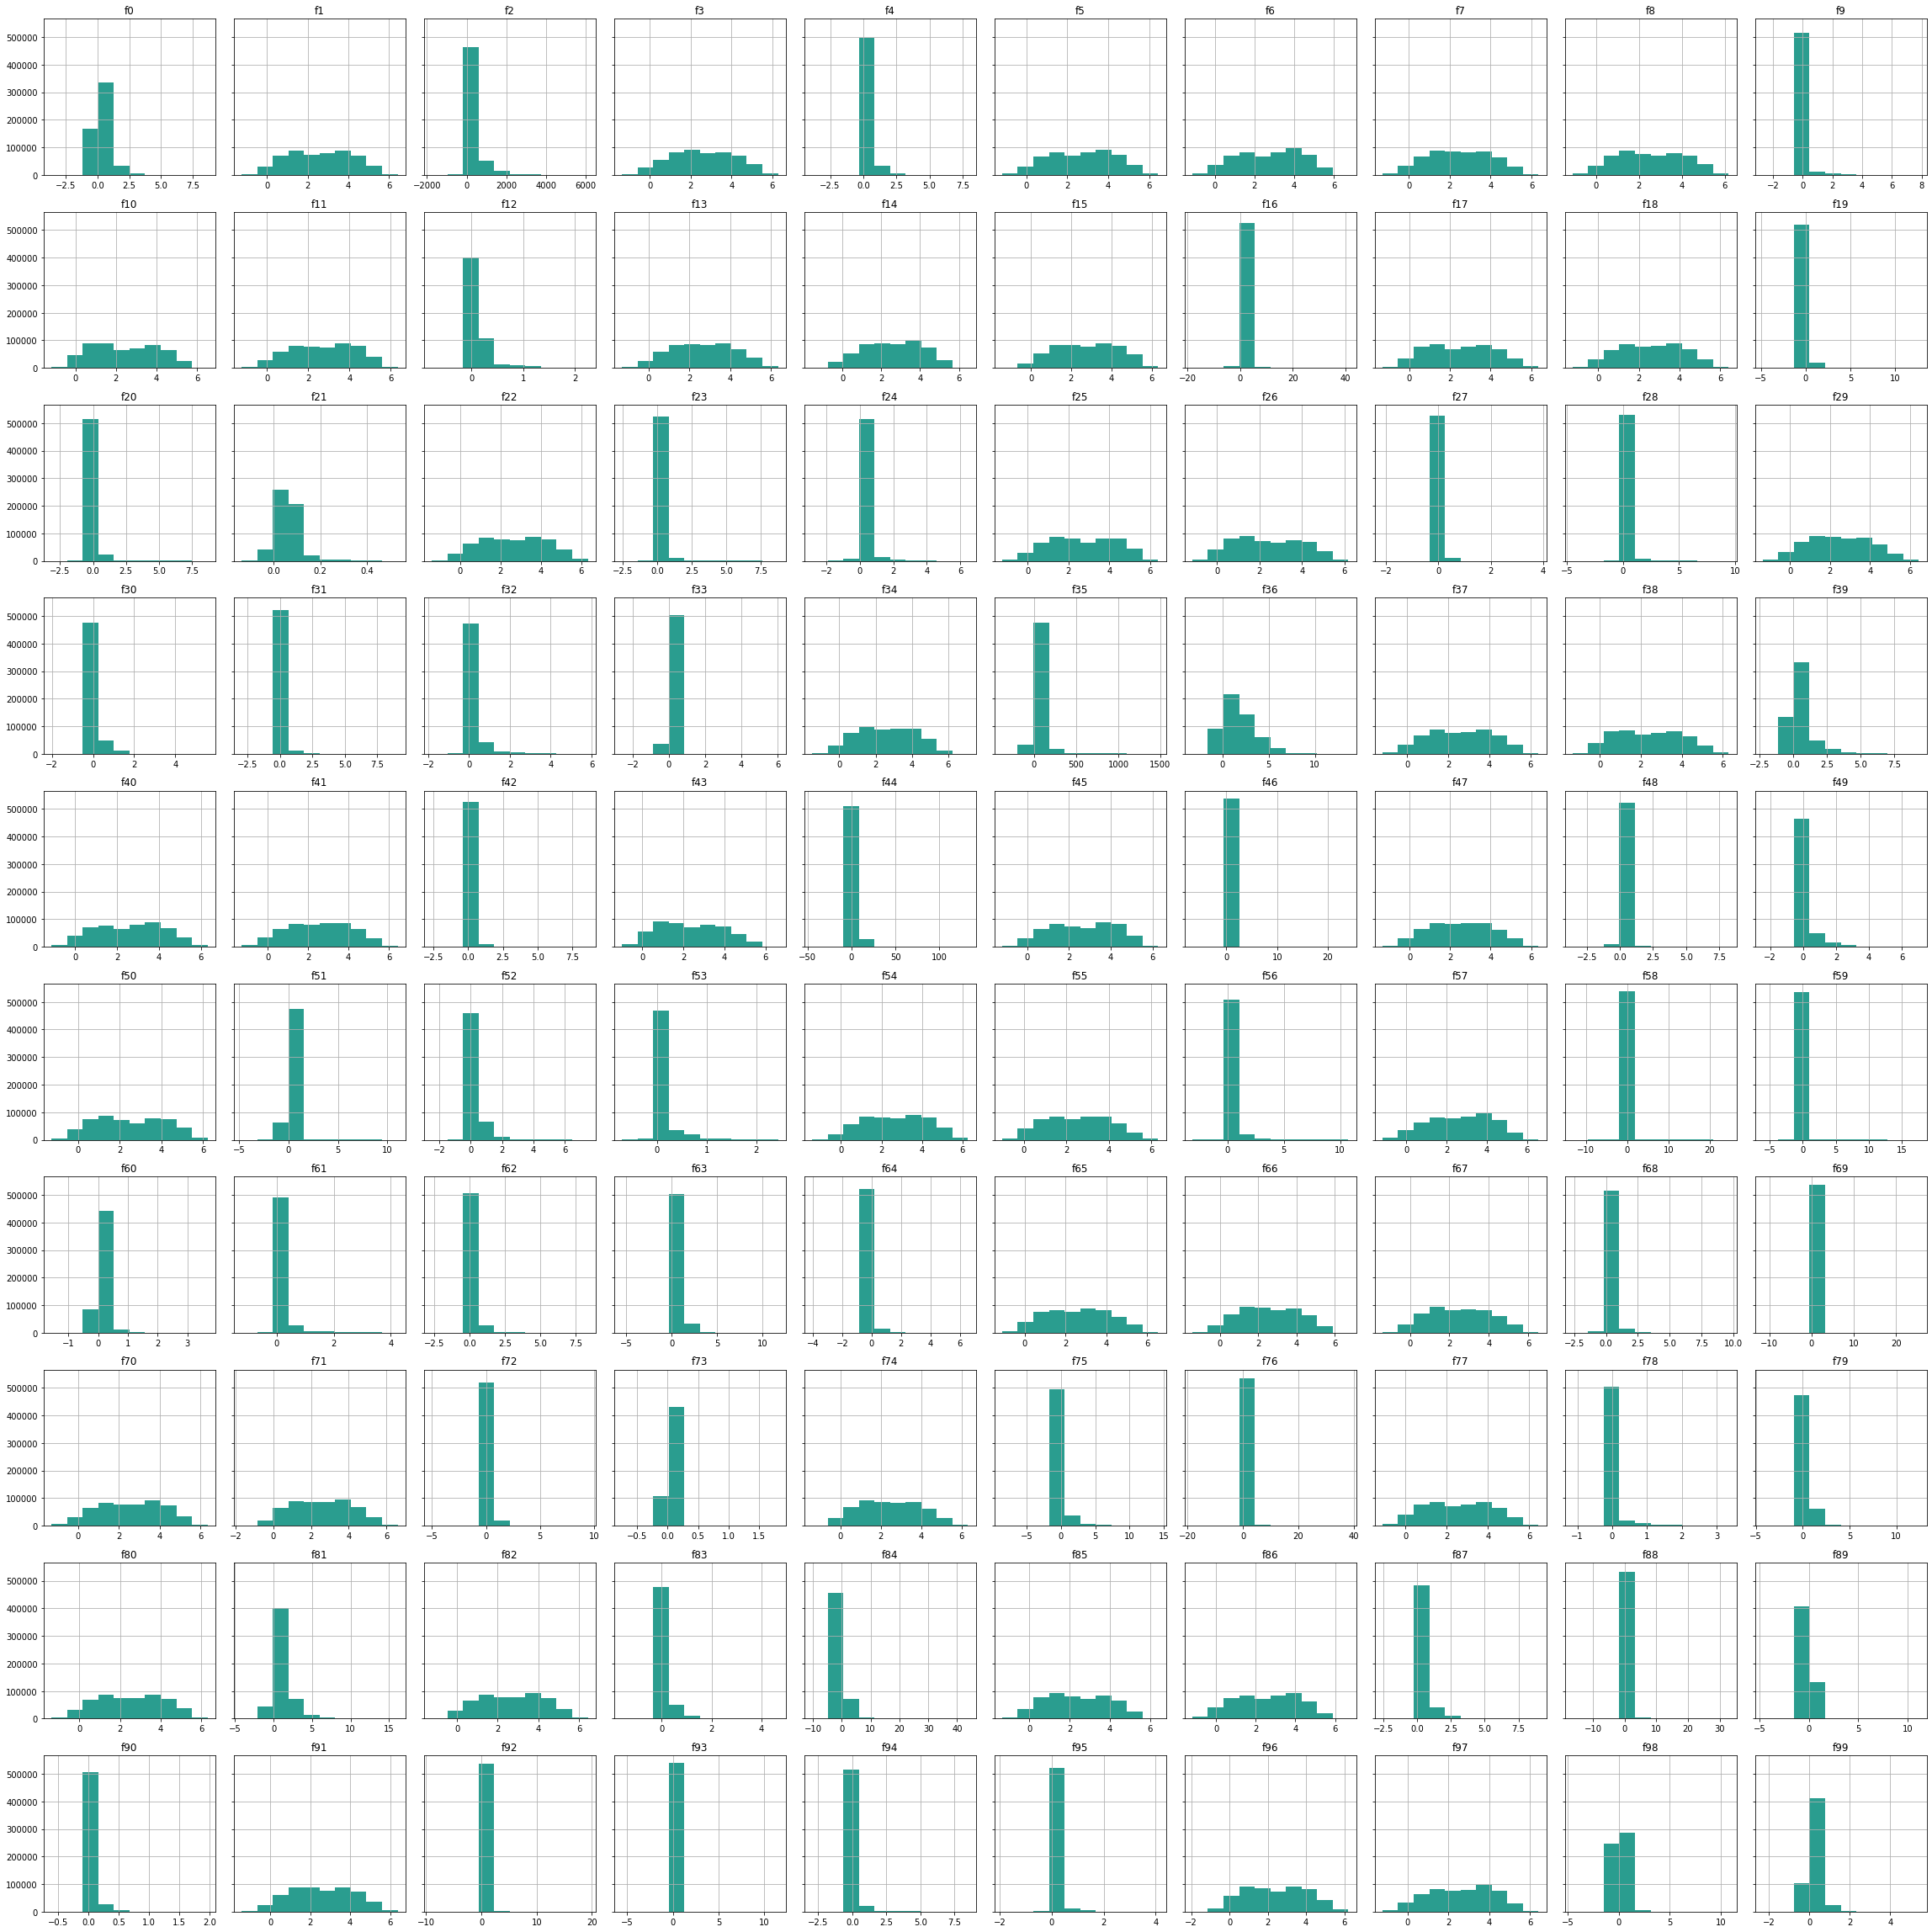

In [27]:
test_df.select_dtypes(include='float64').hist(figsize=(32, 32), sharey=True);
plt.tight_layout()

# Summary 2

The test dataset has 101 features with a total of 540000 samples. All features are of type float64, except for the id variable. There are no missing values. Most of the features distribution looks bimodal or right-skewed.
